### Drought monthly bulletin products

current data base: https://iridl.ldeo.columbia.edu

The drought bulletin are produced on a monthly basis by ACMAD and distributed to the african national Meteorological Services.
It is focussing on climate indices related to drought

Currently the bulletin is covering: 
 * PRECIPITATION  IN PERCENT  OF AVERAGE
 * STANDARDIZED PRECIPITATION INDEX (SPI)
 * SOIL MOISTURE ANOMALY
 * NORMALIZED DIFFERENCE VEGETATION INDEX (NDVI)
 * Drought signal based on precipitation:
 
      **Severe drought** :            RR < [50]%  or  RR [50;  75]% ;  SPI[-3;-2] or SPI<[-3], SM<[-60] & NDVI<[-0.20] 
      
      **Moderate intensity drought**  RR [50; 75]% ; SPI[-2;-1]; SM [-60; -10]mm & NDVI [-0.20; -0.1]
      
      **Low intensity drought**       RR [75; 100]% ; SPI[-1; -0.5]; SM [-30;  -10]mm &  NDVI [-0.1;  0.05]
      
      **No drought signal**

In [1]:
################################################
#  connection to WPS server
#  Climate indices can be performed with finch
################################################

from birdy import WPSClient
# finch = WPSClient('https://pavics.ouranos.ca/twitcher/ows/proxy/finch/', progress=True)
finch = WPSClient('http://localhost:8092', progress=True)

In [2]:
# fp = WPSClient('https://pavics.ouranos.ca/twitcher/ows/proxy/flyingpigeon/', progress=True)
fp = WPSClient('http://localhost:8093', progress=True)

## Start data production for the bulletin

Steps to perform:

* Fetch data 

* subset the region of interest

* Draught indices calculation

* Visualisation


In [3]:
############################
## Data netCDF files sources 

# Precipitation:
precip = 'https://psl.noaa.gov/thredds/fileServer/Datasets/cmap/enh/precip.mon.mean.nc'

# Soilmoisture:
cpcsoil = 'https://psl.noaa.gov/thredds/fileServer/Datasets/cpcsoil/soilw.mon.mean.v2.nc'

# Soilmoisture long term mean:
cpcsoil_ltm = 'https://psl.noaa.gov/thredds/fileServer/Datasets/cpcsoil/soilw.mon.ltm.v2.nc'

# C3S SIS: 
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agroclimatic-indicators?tab=form

# example data set: (hourly!)
# era5 = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/fileServer/birdhouse/ecmwf/era5/pr_era5_reanalysis_hourly_2018.nc'

# http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.CAMS_OPI/.v0208/.mean/.prcp/data.nc
# Jan 1979 to present

In [13]:
# Subset Africa polygon:
precip_africa = fp.subset_continents(resource=precip, region='Africa')

In [20]:
# check precipitation 
precip_africa.get()

subset_continentsResponse(
    output='http://127.0.0.1:8093/outputs/2a4dc40a-9e9d-11ea-98c8-9cb6d08a53e7/precip.mon.mean_Africa.nc',
    metalink='http://127.0.0.1:8093/outputs/2a4dc40a-9e9d-11ea-98c8-9cb6d08a53e7/input.meta4'
)

In [29]:
### Plot the precip of target Month 

plot = fp.plot_map_timemean(resource=precip_africa.get()[0],
                            variable=None,
                            title='Current Month',
                            datestart='2020-01-01',
                            dateend='2020-01-31',
                            cmap='Blues',
                            delta=0.0,
                            vmin=0,
                            vmax=30,
                            )

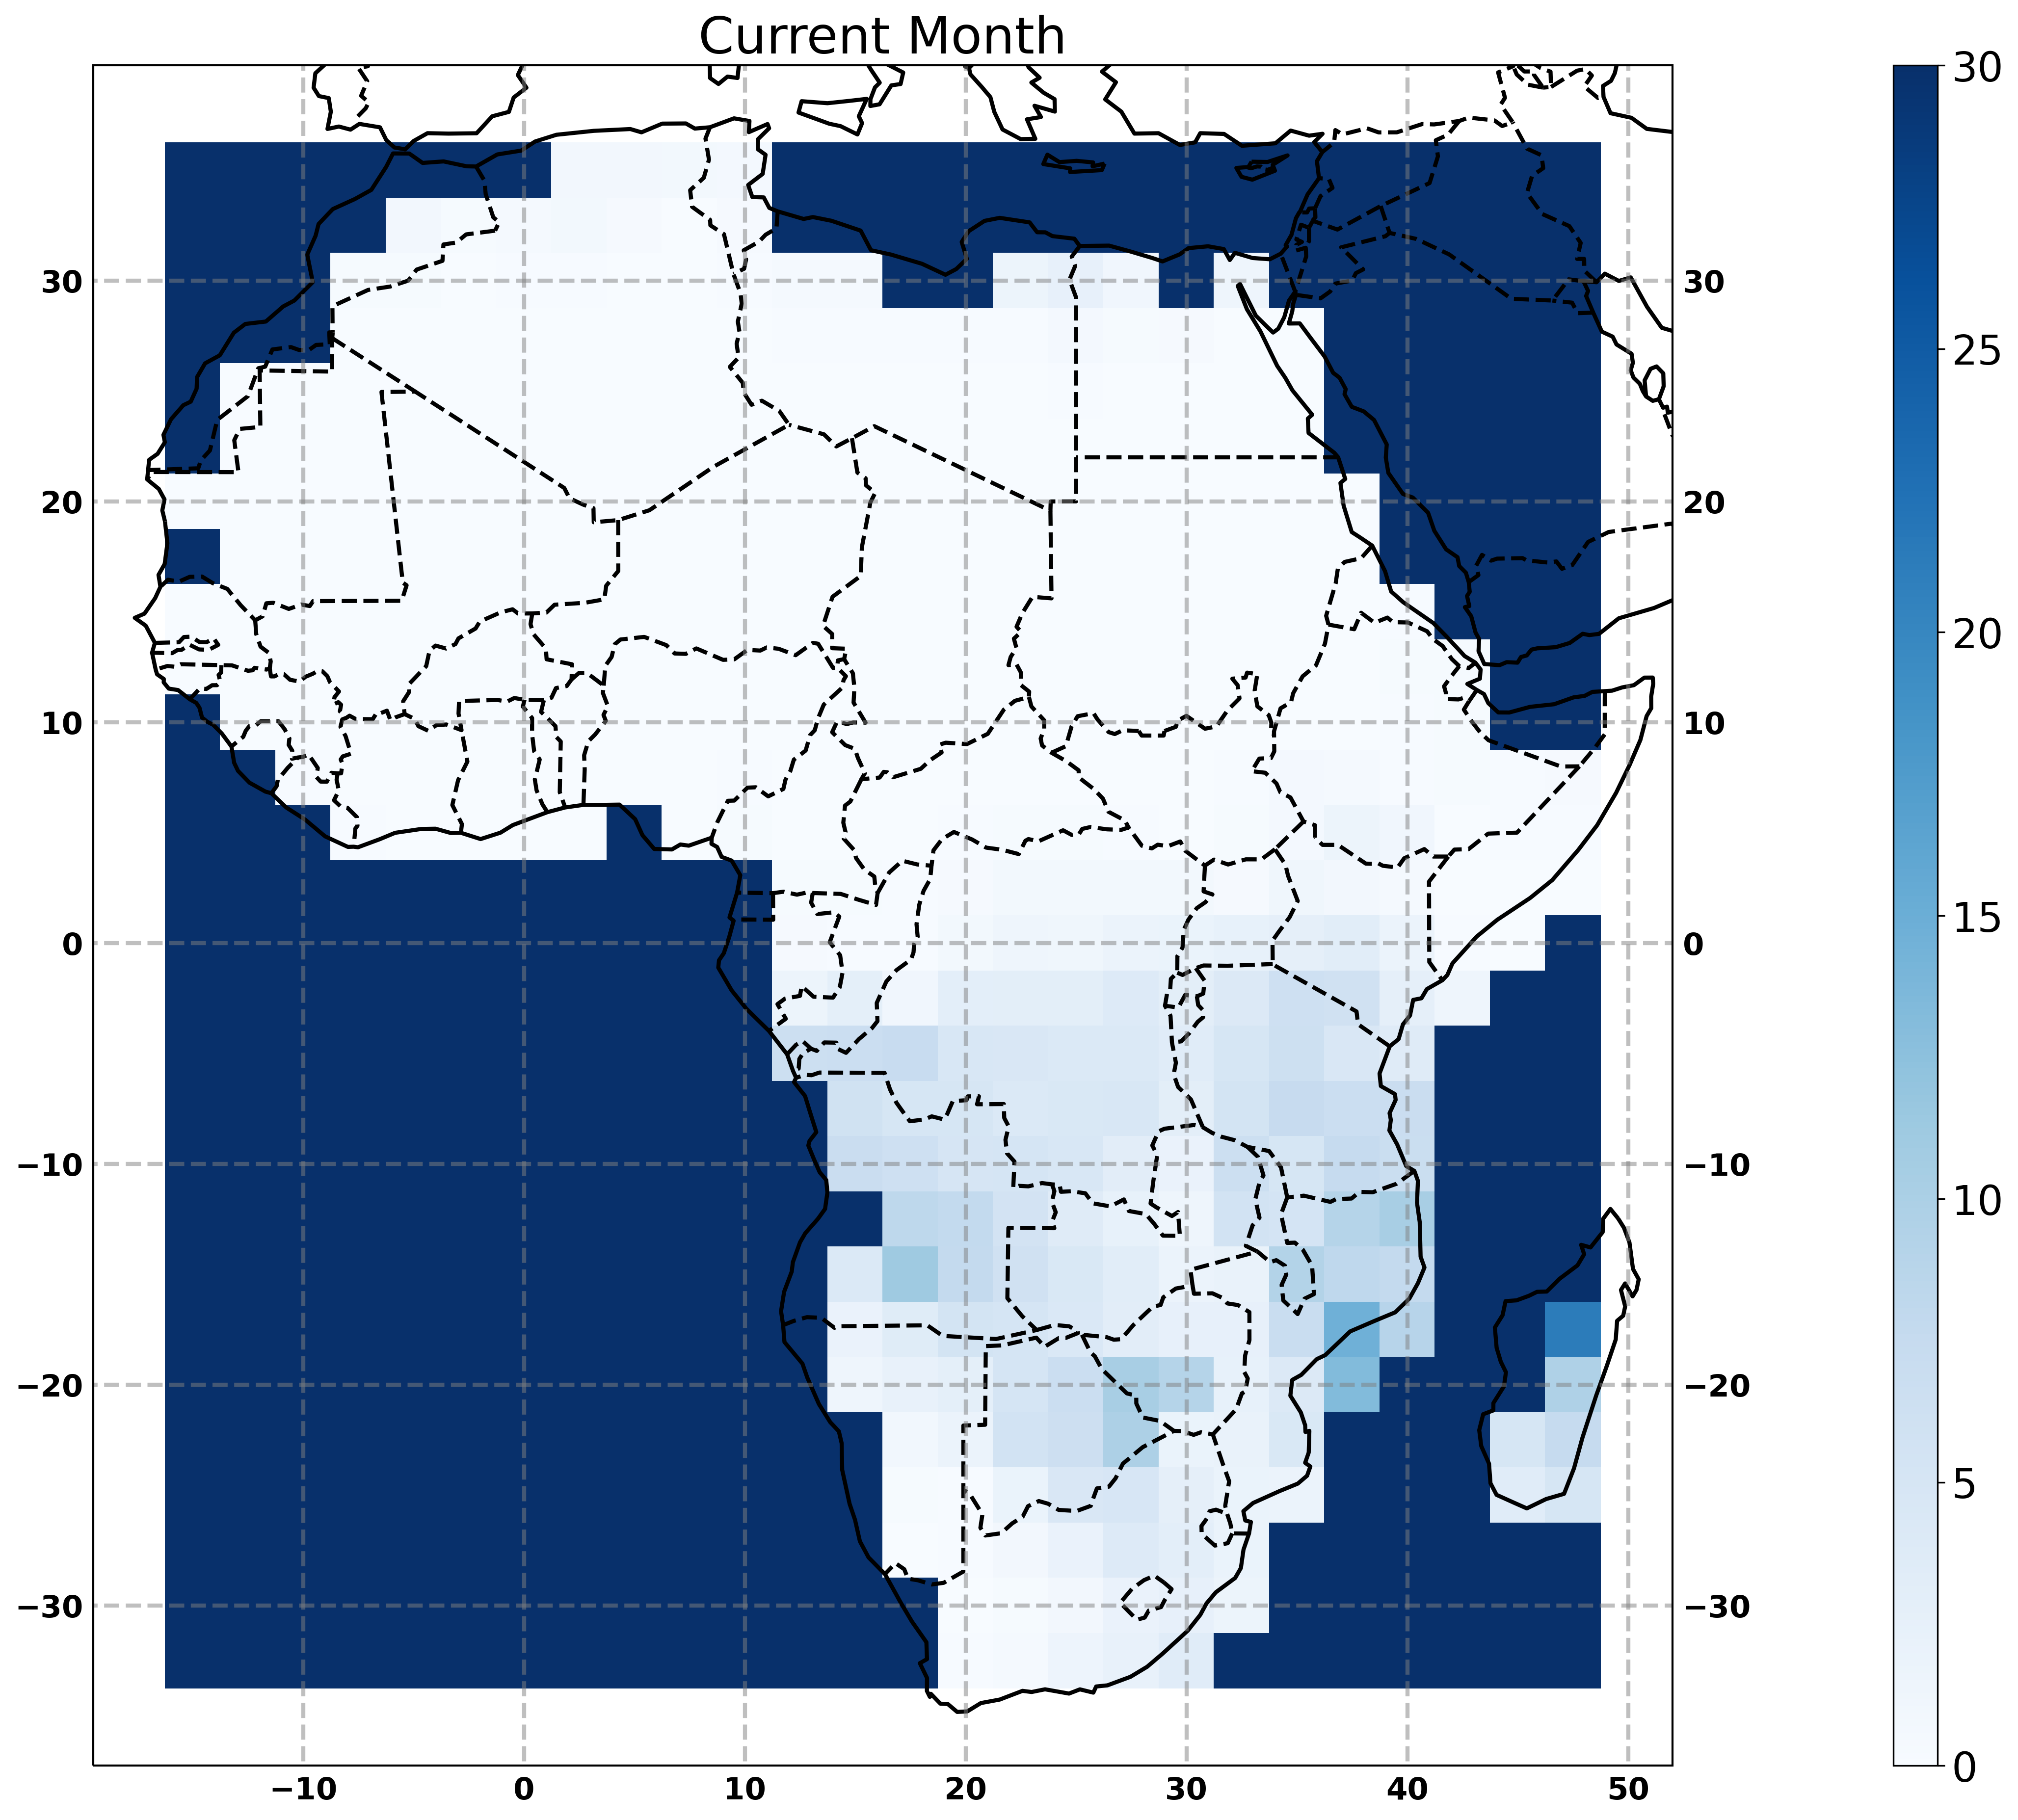

In [30]:
# To display Images from an url
from IPython.core.display import HTML 
from IPython.display import Image

Image(plot.get()[0], width=600)

In [4]:
# calculate multipe datasets in one process 
output = fp.subset_continents(resource=cpcsoil, region='Africa')

In [35]:
### Plot the precip of target Month 

plot = fp.plot_map_timemean(resource=output.get()[0],
                            variable=None,
                            title='Soil Moisture',
#                             datestart='2020-01-01',
#                             dateend='2020-03-31',
                            cmap='BrBG',
                            delta=0.0,
#                             vmin=0,
#                             vmax=30,
                            )


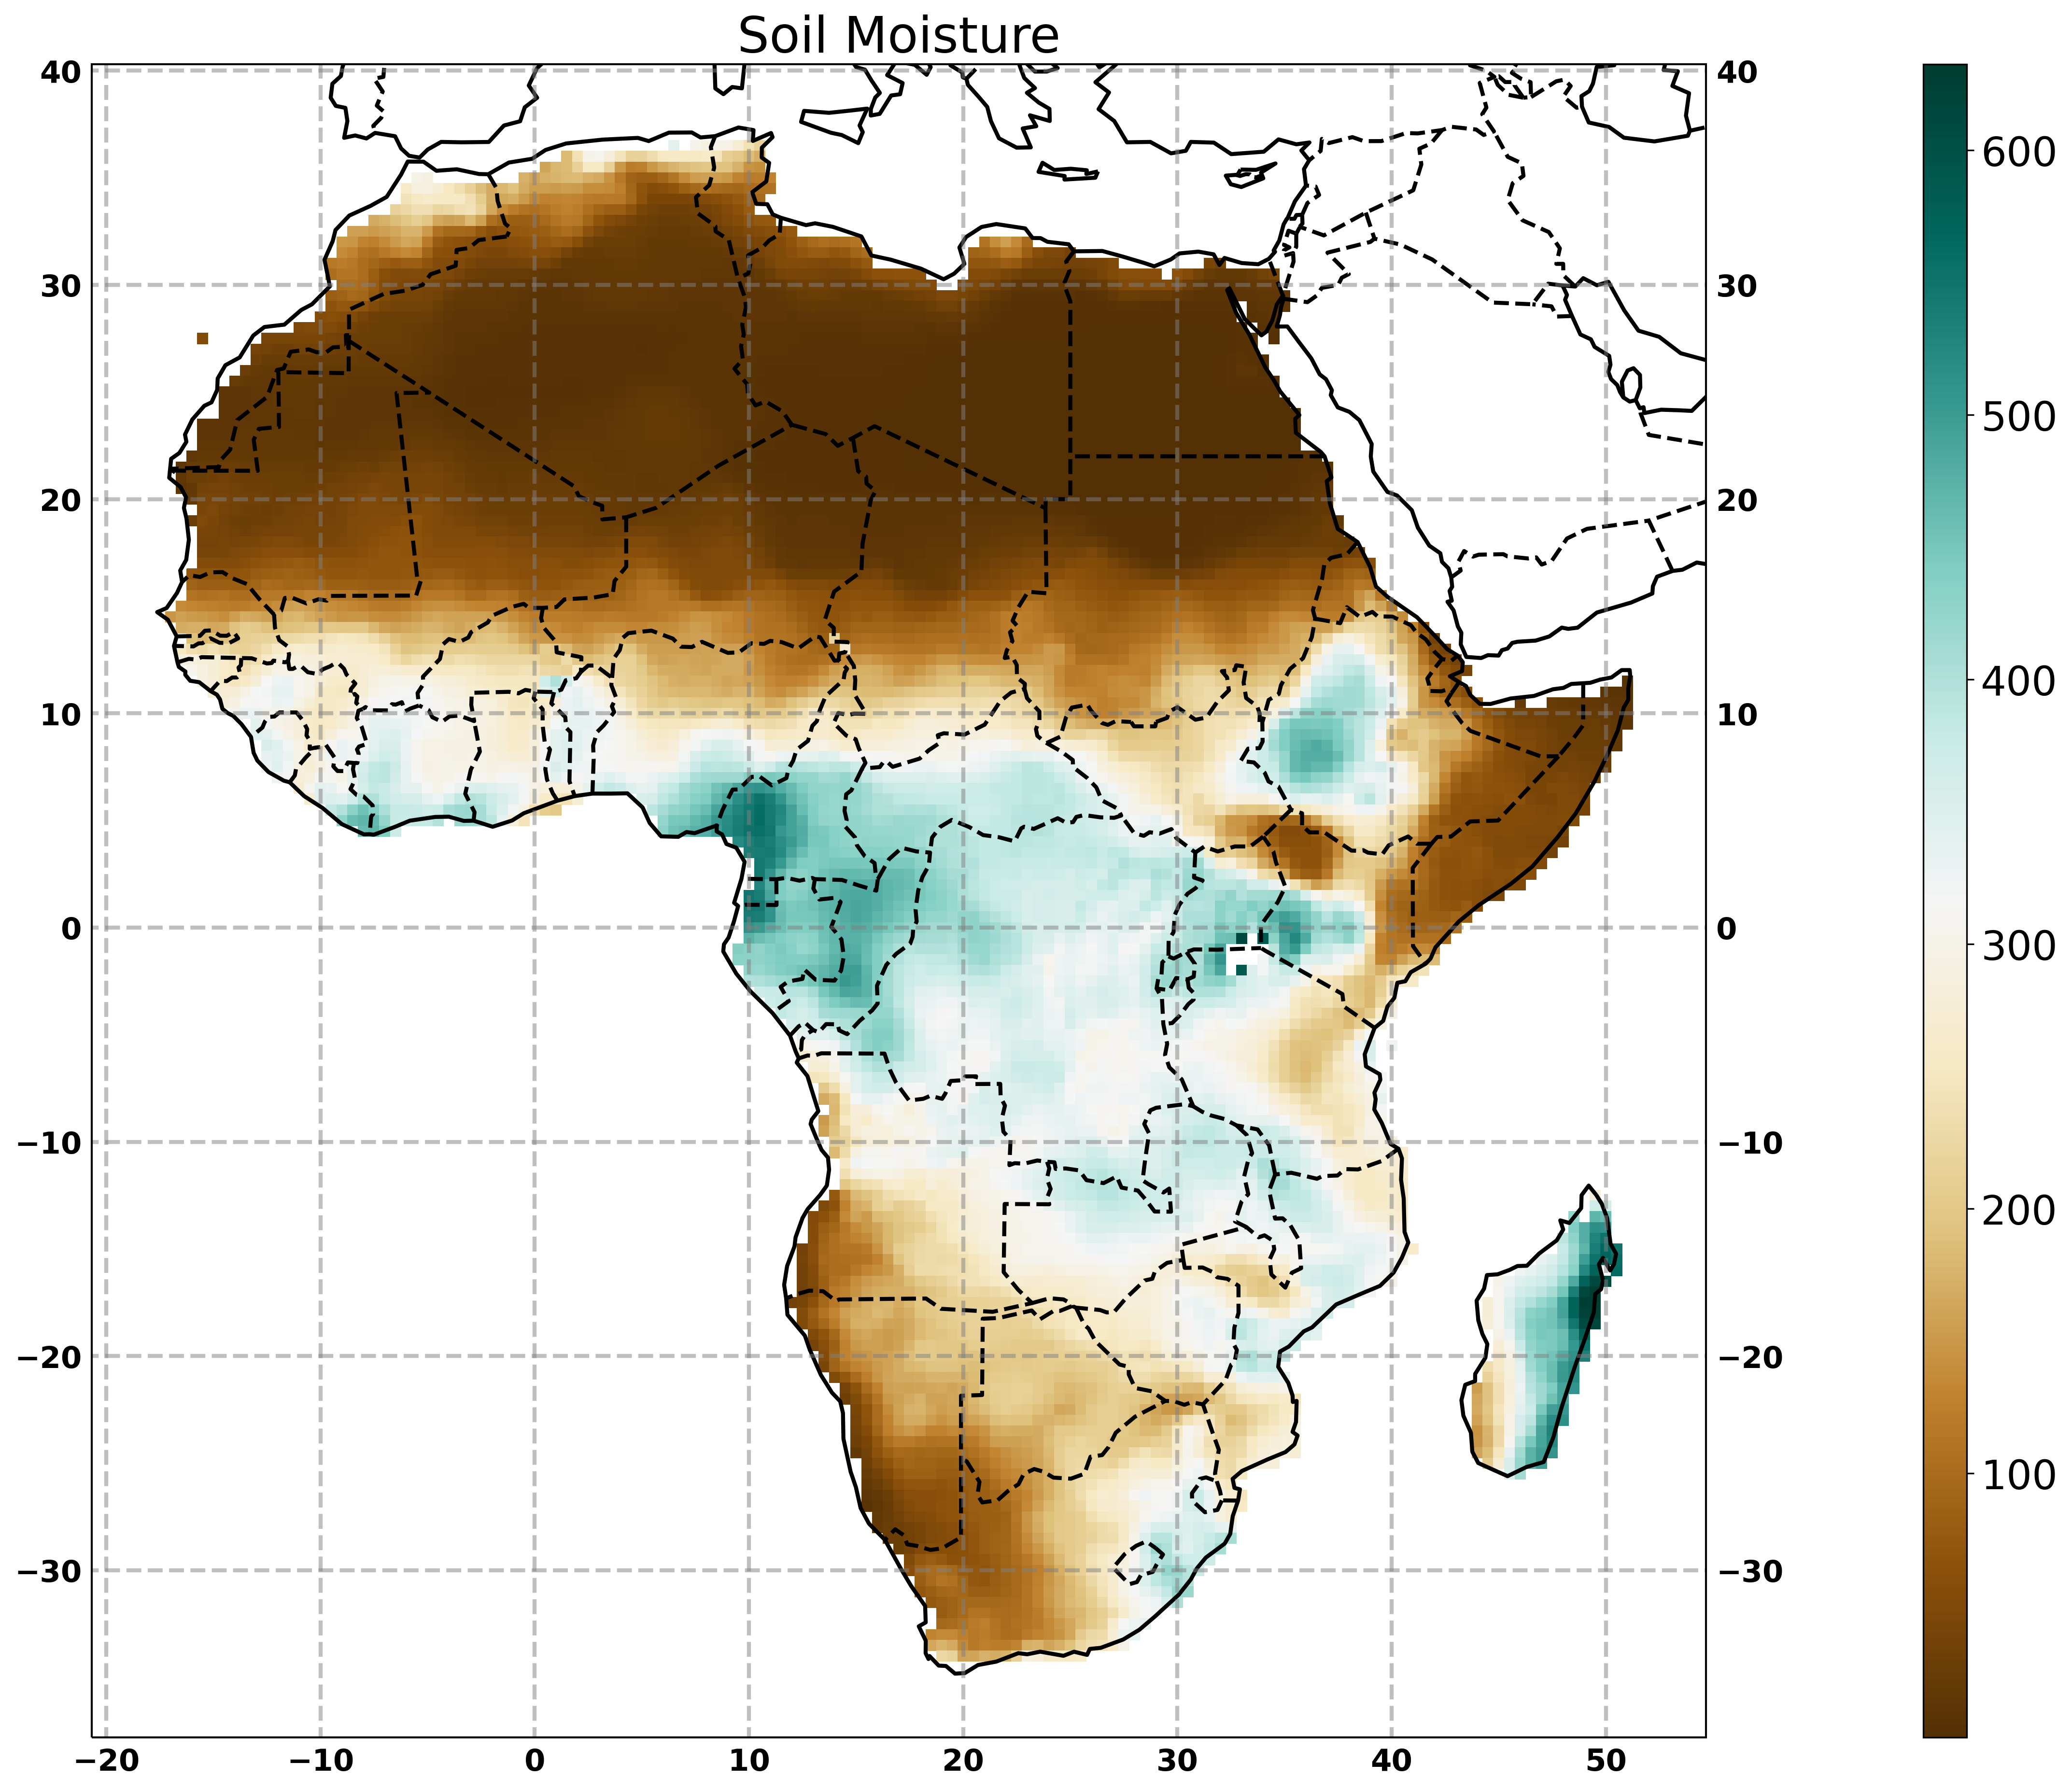

In [36]:
# To display Images from an url
from IPython.core.display import HTML 
from IPython.display import Image

Image(plot.get()[0], width=600)

In [ ]:
# SPI Tutorial:
# https://arset.gsfc.nasa.gov/sites/default/files/water/20-IMERG/IMERG_Week2_FINAL.pdf

# Python drought scripts:
# https://www.drought.gov/drought/climate-and-drought-indices-python

'http://127.0.0.1:8093/outputs/b1044a3a-9e9a-11ea-bc0e-9cb6d08a53e7/soilw.mon.mean.v2_Africa.nc'